In [19]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
import json
import plotly.graph_objects as go

In [14]:
with open('./data/data.json', 'r') as json_file:
    data = json.load(json_file)
    employees = data['employees']
    
profile_urls = [f"{i}: {employees[i]['job_title']}" for i,_ in enumerate(employees)]
    
    
    


In [15]:
embeddings = np.load('./data/embeddings.npy')
print(embeddings[0][:5])
labels = profile_urls #[f"Label {i}" for i in range(len(embeddings))]


[-0.02887947  0.00257788 -0.02663589 -0.03318716 -0.00689679]


In [16]:
# Compute t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings)

In [11]:
# Create a DataFrame for plotting
df = pd.DataFrame(tsne_results, columns=['x', 'y'])
df['label'] = labels

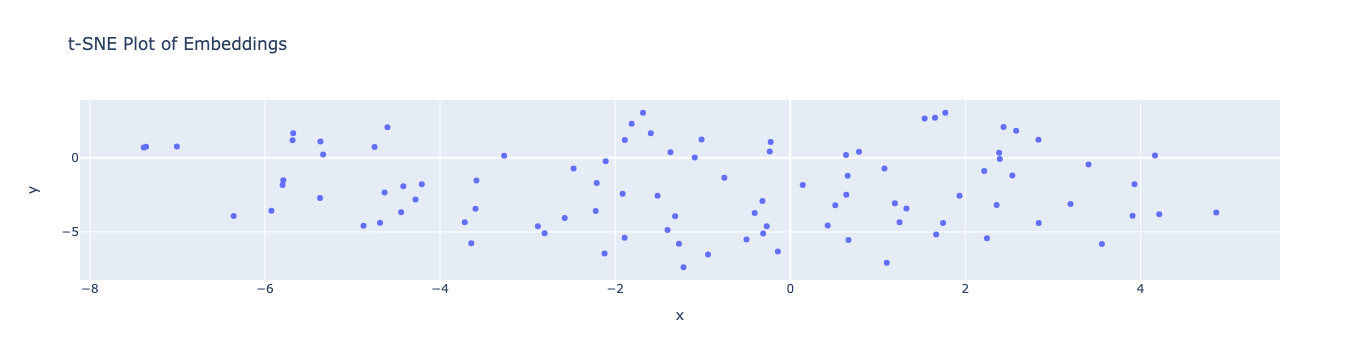

In [12]:
# Create interactive plot
fig = px.scatter(df, x='x', y='y', hover_data=['label'], title='t-SNE Plot of Embeddings')
fig.show()

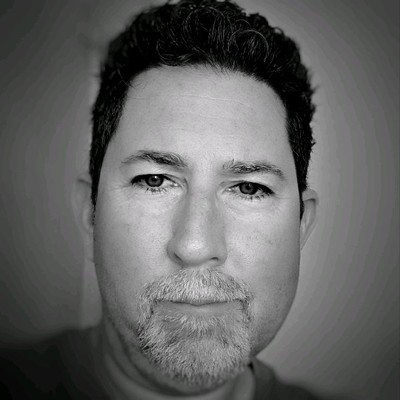

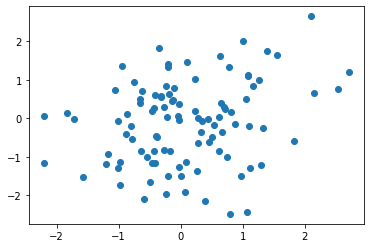

In [23]:
# Assume profile_urls is a list of image URLs corresponding to each embedding
profile_urls = [employee['pfp'] for employee in employees]

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Create a scatter plot
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y)

# Add an image to the plot
img = Image.open(profile_urls[0])
display(img)

# Define a function to show the image on hover
def show_image(event):
    # Get the coordinates of the mouse cursor
    x, y = event.xdata, event.ydata

    # Check if the mouse cursor is over the image
    if img.contains((x, y)):
        # Display the image
        display(img)

# Connect the function to the plot
plt.connect('motion_notify_event', show_image)

# Show the plot
plt.show()